# Desafío - Random Forest



<br>
<div class="alert alert-block alert-success">

<b>Nombre:</b> Juan Oyarce, María Martínez, René Navarro.

<b>Generación:</b> G2.

<b>Profesor:</b> Gabriel Tamayo L.

</div>


* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.

#### Descripción
* Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de **2930 registros** y contiene un gran número de atributos.
* Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable **Sale_Price**.
* A diferencia de otras sesiones donde implementábamos el preprocesamiento a mano, ahora **haremos uso de los archivos serializados en la sesión pasada**.

### Ejercicio 1: Preparación del ambiente de trabajo

* Importe las librerías clásicas a utilizar. Para este ejercicio trabajaremos con un modelo de regresión Random Forest.
* De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión.
* Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [1]:
# ignorar warnings
import warnings
warnings.filterwarnings('ignore')

# Importación de librerías clásicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importación de funciones y clases de métricas de regresión
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error,r2_score
import pickle
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Lectura de archivo
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


### Ejercicio 2: Importación de archivos serializados
* Importe su modelo entrenado y sus conjuntos de entrenamiento y validación serializados la sesión pasada, importe el modelo serializado de su compañero y evalúe el desempeño del modelo de su compañero con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden ser los causantes.
* Para importar un archivo serializado, puede ocupar la siguiente línea de código:


```python 
import pickle
read_model = pickle.load(open(NOMBRE_DEL_ARCHIVO,"rb"))
```
    
<div class="alert alert-block alert-warning">
<b>Tips:</b> 
    
   - No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus métricas.
   
   - Recuerde que para leer los archivos serializados estos deben estar en el mismo directorio de trabajo, en caso contrario deberá ingresar el path (ruta) a ellos.
</div>

In [3]:
# Lectura de mi modelo serializado
model = pickle.load(open('juan-oyarce-actividad07.sav',"rb"))

# Lectura de mis archivos serializados x_train, y_train, x_test e y_test
x_train = pickle.load(open('x_train.sav',"rb"))
X_test = pickle.load(open('X_test.sav',"rb"))
y_train = pickle.load(open('y_train.sav',"rb"))
y_test = pickle.load(open('y_test.sav',"rb"))

In [4]:
# Métricas de mi modelo anterior
print("Test MSE:", mean_squared_error(y_test, model.predict(X_test)).round(5))
print("Test MAE:", median_absolute_error(y_test, model.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, model.predict(X_test)).round(5))

Test MSE: 1821208813.32161
Test MAE: 18000.0
Test R2: 0.7251


In [5]:
# Lectura de modelo serializado de mi compañero
model_javier = pickle.load(open('javier_lopez_actividad07_modelo.sav',"rb"))

C:\Users\renen\Anaconda3\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.21.1 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\renen\Anaconda3\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.21.1 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\renen\Anaconda3\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.21.1 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [6]:
# Métricas del modelo de mi compañero
print("Test MSE:", mean_squared_error(y_test, model_javier.predict(X_test)).round(5))
print("Test MAE:", median_absolute_error(y_test, model_javier.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, model_javier.predict(X_test)).round(5))

ValueError: Number of features of the model must match the input. Model n_features is 306 and input n_features is 10 

## Comparación de resultados: No fue posible comparar el modelo porque el de mi compañero tiene una cantidad distinta de atributos.

### Ejercicio 3: Evaluación Random Forest
* En base a sus conjuntos de entrenamiento serializados, genere un modelo utilizando sklearn.ensemble.RandomForest sin modificar hiperparámetros, sólo declarando la semilla pseudoaleatoria.
* Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como con el de su compañero.

<div class="alert alert-block alert-warning">
<b>Tips:</b> 
    
   - Debe utilizar sus datos de entrenamiento/testeo serializados (obtenidos en ejercicio 2). No utilizar train_test_split.
</div>

In [8]:
# Generación y entrenamiento de modelo Random Forest
forest = RandomForestRegressor(n_jobs=-1, random_state=1986)
forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=1986, verbose=0, warm_start=False)

In [9]:
# Reporte de desempeño y comparación con mi modelo anterior
print("Test MSE:", mean_squared_error(y_test, forest.predict(X_test)).round(5))
print("Test MAE:", median_absolute_error(y_test, forest.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, forest.predict(X_test)).round(5))

Test MSE: 1009428541.07885
Test MAE: 13206.5
Test R2: 0.84763


### El modelo claramente mejora aplicando Random Forest, el R2 aumenta desde 0.72 a 0.84 y el MAE desminuye de 18000 a 13206.

### Ejercicio 4: Reporte las métricas de desempeño
* Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes hiperparámetros:
    * max_features : None , log2 , sqrt .
    * n_estimators : Evaluar entre 20 y 1000 en pasos de 50.
* Guarde la tasa de error en la exactitud medida con OOB.
* Grafique el comportamiento.

<div class="alert alert-block alert-warning">
<b>Tips:</b> 
    
   - n_estimators a evaluar incluye el 20 y excluye el 1000
</div>

In [11]:
# generamos una serie de listas para guardar los valores
tmp_oob_none, tmp_oob_sqrt,tmp_oob_log2 = [], [], []
tmp_test_acc_none, tmp_test_acc_sqrt, tmp_test_acc_log = [], [], []
n_estimators = range(20, 1000, 50)

In [13]:
# para cada rango de modelos estimados
for i in n_estimators:
# Implementamos una variante con todos los atributos
    voting_rf_none = RandomForestRegressor(n_estimators = i,max_features=None, oob_score=True, random_state=123).fit(x_train, y_train)
# Implementamos una variante donde los atributos se escogen con sqrt
    voting_rf_sqrt = RandomForestRegressor(n_estimators = i, max_features="sqrt", warm_start=True, oob_score=True, random_state=123).fit(x_train, y_train)
# Implementamos una variante donde los atributos se escogen con log
    voting_rf_log = RandomForestRegressor(n_estimators = i, max_features="log2", warm_start=True, oob_score=True, random_state=123).fit(x_train, y_train)
# Estimamos el error en OOB
    tmp_oob_none.append(1 - voting_rf_none.oob_score_)
    tmp_oob_sqrt.append(1 - voting_rf_sqrt.oob_score_)
    tmp_oob_log2.append(1 - voting_rf_log.oob_score_)

<Figure size 864x288 with 0 Axes>

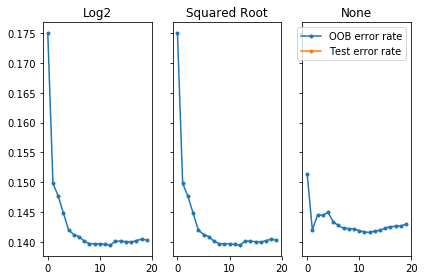

In [14]:
plt.figure(figsize=(12, 4));
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True);
axs[0].plot(tmp_oob_log2, '.-', label='OOB error rate');
axs[0].plot(tmp_test_acc_log, '.-', label='Test error rate');
axs[0].set_title('Log2');
axs[1].plot(tmp_oob_sqrt,'.-', label='OOB error rate');
axs[1].plot(tmp_test_acc_sqrt,'.-', label='Test error rate');
axs[1].set_title('Squared Root');
axs[2].plot(tmp_oob_none, '.-', label='OOB error rate');
axs[2].plot(tmp_test_acc_none,'.-', label='Test error rate');
axs[2].set_title('None');
plt.tight_layout();
plt.legend();

In [15]:
pd.DataFrame(zip(tmp_oob_sqrt, n_estimators)).sort_values(0)

,0,1
12,0.139450,620
11,0.139599,570
10,0.139667,520
9,0.139693,470
8,0.139706,420
16,0.139955,820
15,0.140056,770
14,0.140107,720
7,0.140129,370
13,0.140142,670


### A través de la gráfica y el ordenamiento de datos se encuentra que el numero óptimo de estimadores es de  670, siendo el modelo a elegir *"sqrt"* que muestra junto con *"Log2"* el punto mas bajo en la gráfica.

### Ejercicio 5: Refactorice el modelo
* En base a la mejor combinación de hiperparámetros, reentrene el modelo y comente su desempeño.

<div class="alert alert-block alert-warning">
<b>Tips:</b> 
    
   - Debe utilizar sus datos de entrenamiento/testeo serializados (obtenidos en ejercicio 2). No utilizar train_test_split.
</div>

In [21]:
# Reentranamiento modelo refactorizado
model_refactor = RandomForestRegressor(n_estimators= 670,
    max_features="sqrt",
    warm_start=True,
    n_jobs=-1,                                     
    oob_score=True,
    random_state=1986).fit(x_train, y_train)

In [22]:
print("Test MSE:", mean_squared_error(y_test, model_refactor.predict(X_test)).round(5))
print("Test MAE:", median_absolute_error(y_test, model_refactor.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test,  model_refactor.predict(X_test)).round(5))

Test MSE: 968976522.70728
Test MAE: 12428.04328
Test R2: 0.85374


### El modelo con la mejor combinación de hiperparametros mejora en un 1% en términos de R2 y el MAE disminuye en aproximadamente 1000 unidades.